# Introduction

Predicting the price of a used car is a practical application of data analysis and machine learning with direct impact on the automobile industry. The goal of this project is to build a regression model that accurately estimates the selling price of a car based on various attributes such as its brand, manufacturing year, fuel type, transmission, mileage, and more.

This project uses a real-world dataset containing used car listings, and follows a complete machine learning pipeline:
- Exploratory Data Analysis (EDA) to understand trends and patterns  
- Data preprocessing including handling missing values and encoding categorical features  
- Model training using **Linear Regression**  
- Evaluation of the model’s performance using appropriate metrics  

The project aims to not only build a predictive model but also extract insights from the data — for example, how car price is influenced by mileage or how certain brands depreciate faster than others.

This notebook showcases how data-driven decision-making can be applied to domains like online car marketplaces, resale platforms, and automotive dealerships, where pricing strategy is critical.


## Importing the relevant libraries

In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [54]:
raw_data = pd.read_csv('carproject.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring descriptive statistics of the variables

In [55]:
raw_data.describe(include='all').round(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000,4345,4345.000,4195.000,4345,4345,4345.000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.747,NaN,161.237,2.791,NaN,NaN,2006.550,NaN
std,NaN,25584.243,NaN,105.706,5.066,NaN,NaN,6.719,NaN
min,NaN,600.000,NaN,0.000,0.600,NaN,NaN,1969.000,NaN
25%,NaN,6999.000,NaN,86.000,1.800,NaN,NaN,2003.000,NaN
50%,NaN,11500.000,NaN,155.000,2.200,NaN,NaN,2008.000,NaN
75%,NaN,21700.000,NaN,230.000,3.000,NaN,NaN,2012.000,NaN


### Determining the variables of interest

In [56]:
raw_data = raw_data.drop(['Model'],axis=1)

In [57]:
raw_data.describe(include='all').round(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000,4345,4345.000,4195.000,4345,4345,4345.000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.747,NaN,161.237,2.791,NaN,NaN,2006.550
std,NaN,25584.243,NaN,105.706,5.066,NaN,NaN,6.719
min,NaN,600.000,NaN,0.000,0.600,NaN,NaN,1969.000
25%,NaN,6999.000,NaN,86.000,1.800,NaN,NaN,2003.000
50%,NaN,11500.000,NaN,155.000,2.200,NaN,NaN,2008.000
75%,NaN,21700.000,NaN,230.000,3.000,NaN,NaN,2012.000


### Dealing with missing values

In [58]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [59]:
# Missing values are less that 5%, so it's okay if we drop them completely
raw_data = raw_data.dropna()

In [60]:
raw_data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [61]:
raw_data.describe(include='all').round(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000,4025,4025.000,4025.000,4025,4025,4025.000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308,NaN,163.572,2.765,NaN,NaN,2006.380
std,NaN,25815.735,NaN,103.395,4.936,NaN,NaN,6.696
min,NaN,600.000,NaN,0.000,0.600,NaN,NaN,1969.000
25%,NaN,6999.000,NaN,90.000,1.800,NaN,NaN,2003.000
50%,NaN,11500.000,NaN,158.000,2.200,NaN,NaN,2007.000
75%,NaN,21900.000,NaN,230.000,3.000,NaN,NaN,2012.000


### Exploring the PDFs

<Axes: xlabel='Price', ylabel='Count'>

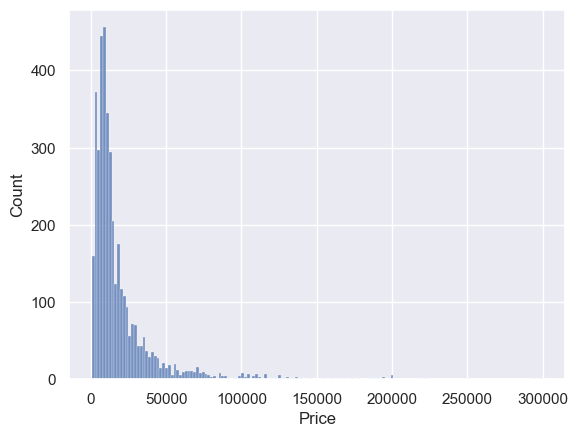

In [62]:
sns.histplot(raw_data['Price'])

### Dealing with outliers

<Axes: xlabel='Price', ylabel='Count'>

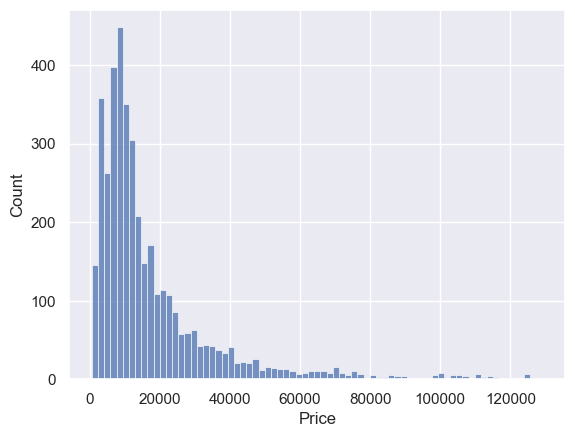

In [63]:
q = raw_data['Price'].quantile(0.99)
raw_data = raw_data[raw_data['Price']<q]
sns.histplot(raw_data['Price'])

<Axes: xlabel='Mileage', ylabel='Count'>

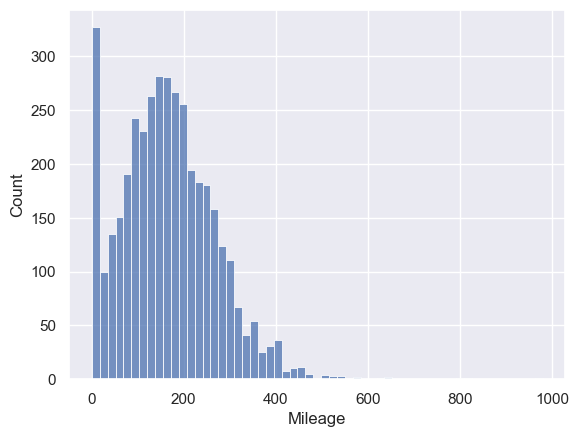

In [64]:
sns.histplot(raw_data['Mileage'])

<Axes: xlabel='Mileage', ylabel='Count'>

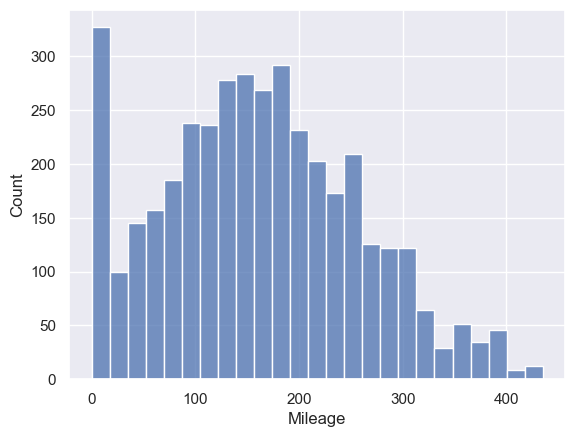

In [65]:
q1 = raw_data['Mileage'].quantile(0.99)
raw_data = raw_data[raw_data['Mileage']<q1]
sns.histplot(raw_data['Mileage'])

<Axes: xlabel='EngineV', ylabel='Count'>

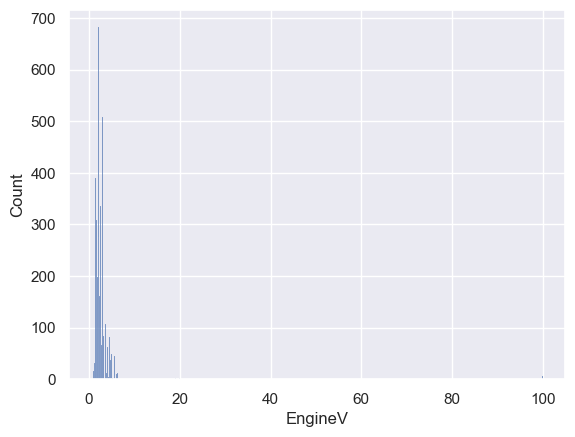

In [66]:
sns.histplot(raw_data['EngineV'])

In [67]:
raw_data = raw_data[raw_data['EngineV']<6.5]

<Axes: xlabel='EngineV', ylabel='Count'>

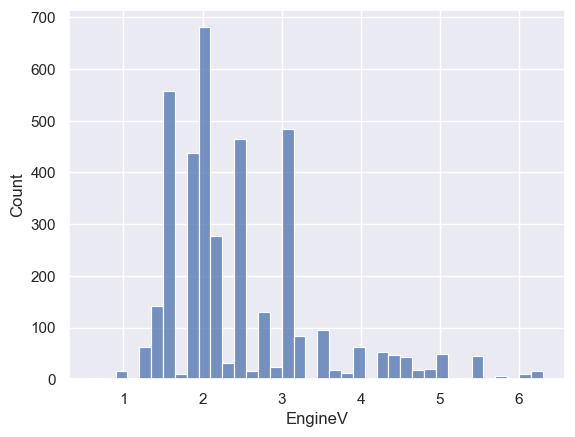

In [68]:
sns.histplot(raw_data['EngineV'])

<Axes: xlabel='Year', ylabel='Count'>

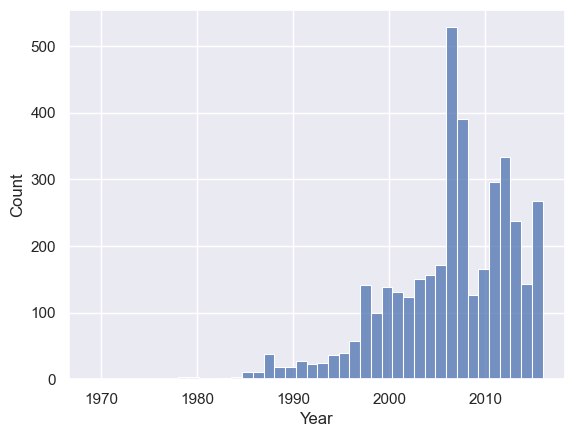

In [69]:
sns.histplot(raw_data['Year'])

In [70]:
q3 = raw_data['Year'].quantile(0.01)
raw_data = raw_data[raw_data['Year']>q3]

<Axes: xlabel='Year', ylabel='Count'>

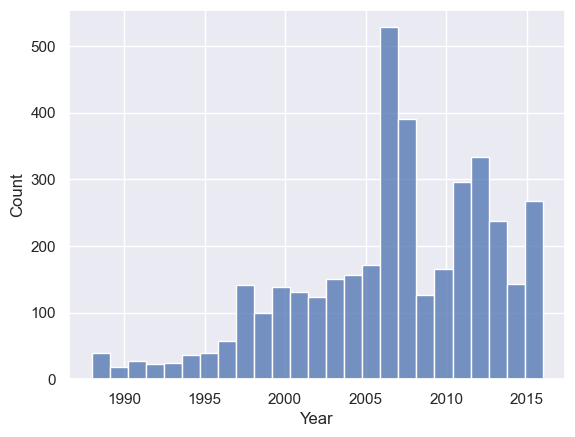

In [71]:
sns.histplot(raw_data['Year'])

In [72]:
data_cleaned = raw_data.reset_index(drop=True)

In [73]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

Text(0.5, 1.0, 'Price and Mileage')

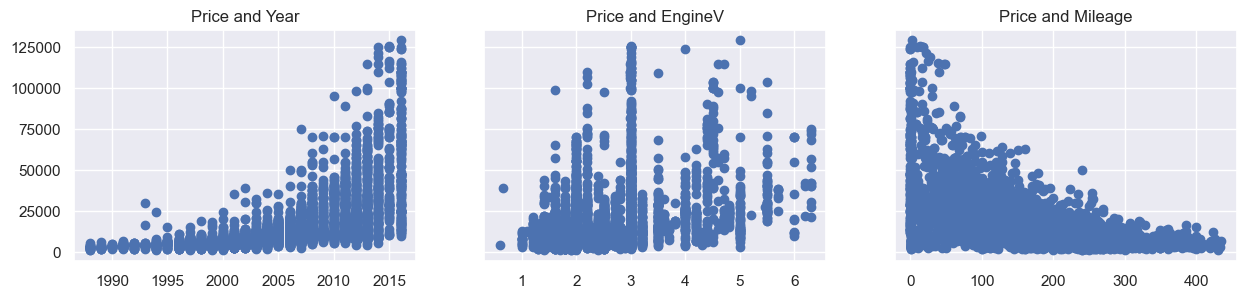

In [74]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

### Relaxing the assumptions

In [75]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Text(0.5, 1.0, 'Log Price and Mileage')

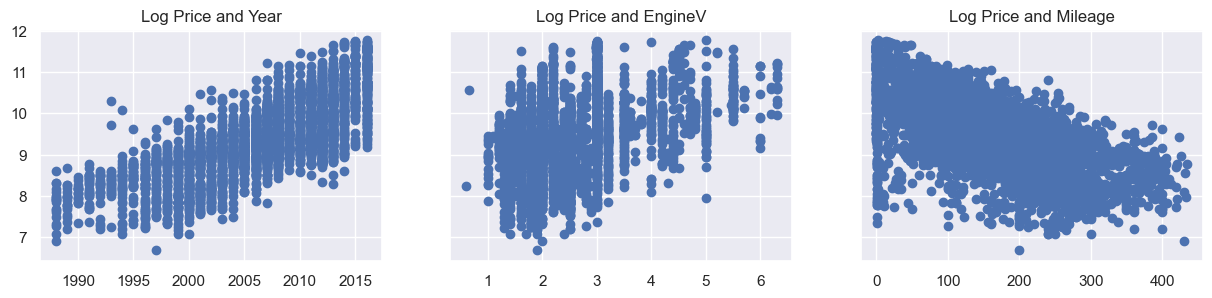

In [76]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

In [77]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinierity

In [78]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [80]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [81]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [82]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [83]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [84]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Linear Regression Model

### Declaring inputs and targets

In [85]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scaling the data

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Creating regression

In [88]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [89]:
y_hat = reg.predict(x_train)

(6.0, 13.0)

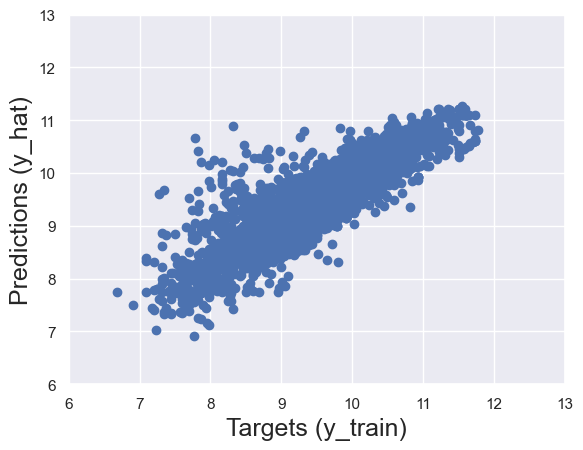

In [90]:
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim(6,13)
plt.ylim(6,13)

Text(0.5, 1.0, 'Residuals PDF')

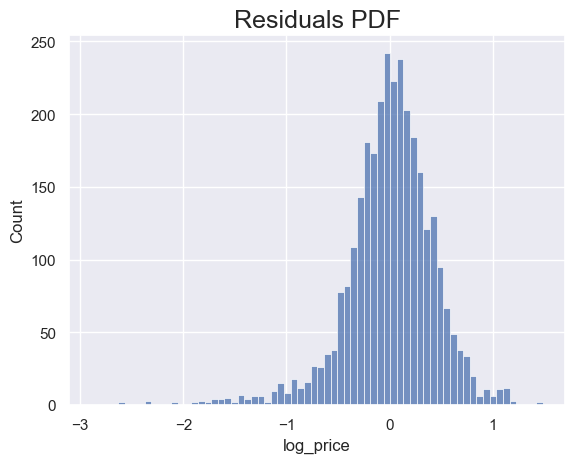

In [91]:
sns.histplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

In [92]:
reg.score(x_train,y_train)

0.744996578792662

### Finding weights and Bias

In [93]:
reg.intercept_

9.415239458021299

In [94]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [95]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [96]:
reg_summary.sort_values(['Weights'],ascending=False)

,Features,Weights
16,Registration_yes,0.320473
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
14,Engine Type_Other,-0.033368
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
9,Body_other,-0.101444
13,Engine Type_Gas,-0.121490
11,Body_vagon,-0.129887


## Testing

In [97]:
y_hat_test = reg.predict(x_test)

(6.0, 13.0)

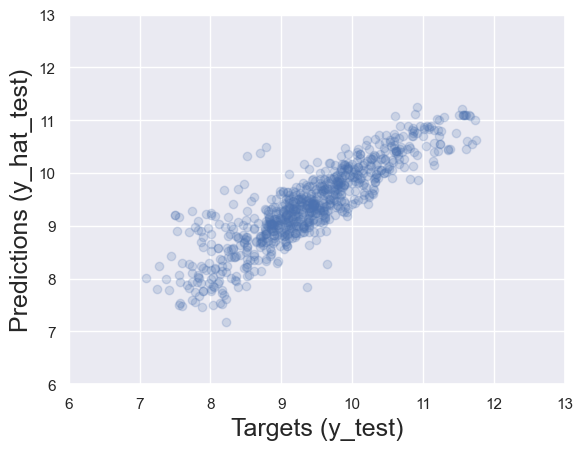

In [98]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)

In [99]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [100]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [101]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [102]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [103]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [104]:
df_pf = df_pf.round(2)
df_pf = df_pf.sort_values(by=['Difference%'])
df_pf

,Prediction,Target,Residual,Difference%
698,30480.85,30500.0,19.15,0.06
742,16960.31,16999.0,38.69,0.23
60,12469.21,12500.0,30.79,0.25
110,25614.14,25500.0,-114.14,0.45
367,42703.68,42500.0,-203.68,0.48
...,...,...,...,...
657,32481.05,6000.0,-26481.05,441.35
162,9954.42,1800.0,-8154.42,453.02
451,35956.50,6500.0,-29456.50,453.18
532,10019.90,1800.0,-8219.90,456.66


## Conclusion

In this project, we successfully built a machine learning model to predict the price of used cars based on key features such as brand, manufacturing year, kilometers driven, fuel type, and transmission. By performing thorough data cleaning and exploratory analysis, we gained valuable insights into how these factors influence car prices.

We implemented a **Linear Regression** model, which provided a baseline prediction capability. The model was evaluated using standard regression metrics, giving us a clear understanding of its performance and limitations.

Key takeaways include:
- Newer cars and cars with lower mileage generally command higher prices.
- Fuel type and transmission can significantly impact valuation depending on market trends.
- Some brands hold their value better than others, which could be useful for buyers and sellers alike.

While the current model offers decent predictive power, future improvements could include testing more advanced algorithms (e.g., Ridge Regression, Random Forests), performing hyperparameter tuning, and integrating more real-world features like location, engine capacity, or service history.

Overall, this project demonstrates the end-to-end process of using data science to solve a practical, real-world problem in the automotive domain.
